In [1]:
# upgrade datasets optional

!pip install -U datasets

In [2]:
#install libraries for loading and finetuning gpt2 
!pip install transformers datasets torch

In [3]:
# import library to load the dataset
from datasets import load_dataset, Dataset

In [4]:
#load dataset
dataset = load_dataset("ccdv/pubmed-summarization")

In [5]:
#creating dataframe
import pandas as pd

df = pd.DataFrame(dataset['train'])

In [6]:
#printing first few rows of dataset

df.head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...


In [7]:
# Calculate the number of characters in 'article' and 'abstract' columns
df['article_char_count'] = df['article'].apply(len)
df['abstract_char_count'] = df['abstract'].apply(len)


In [8]:
#printing first few rows of dataset

df.head()

,article,abstract,article_char_count,abstract_char_count
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...,28460,1575
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...,18281,2010
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...,7419,1009
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...,37370,1403
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...,6918,1039


In [9]:
# statistics of the count columns

df[['article_char_count','abstract_char_count']].describe()

,article_char_count,abstract_char_count
count,119924.000000,119924.000000
mean,17585.276233,1233.188486
std,14599.306969,461.285535
min,0.000000,174.000000
25%,8560.000000,886.000000
50%,14879.000000,1276.000000
75%,22979.250000,1582.000000
max,825741.000000,4340.000000


In [10]:
# printing the rows with no value in article columns

df.loc[df['article_char_count'] == 0]

,article,abstract,article_char_count,abstract_char_count
11,,we compared serum polychlorinated dibenzo - p ...,0,2008
22,,because of rampant concern that estrogenic che...,0,1839
50,,we have prepared two new diastereoisomeric \n ...,0,625
151,,mypro is a software pipeline for high - qualit...,0,373
175,,octane - enhancing constituents of gasoline po...,0,1071
...,...,...,...,...
119745,,cells comprising a tissue migrate as part of a...,0,1221
119841,,pathologic response of tissue to asbestos in v...,0,1490
119847,,adequate cognitive functioning is essential fo...,0,453
119863,,the aluminum concentration and ryznar index in...,0,1384


In [11]:
#removing the rows with no value in article columns

df= df[df['article_char_count'] != 0]

In [12]:
# confirmed that the rows with no value in article columns

df.loc[df['article_char_count'] == 0]

,article,abstract,article_char_count,abstract_char_count


In [13]:
# printing stats for the counts

df[['article_char_count','abstract_char_count']].describe()

,article_char_count,abstract_char_count
count,117232.000000,117232.000000
mean,17989.087169,1235.163505
std,14517.915998,460.254653
min,3.000000,205.000000
25%,8927.750000,890.000000
50%,15163.500000,1280.000000
75%,23228.000000,1582.000000
max,825741.000000,4340.000000


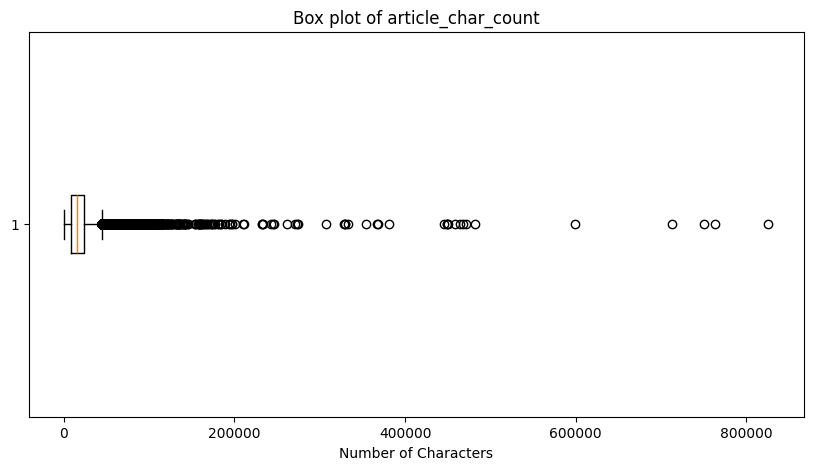

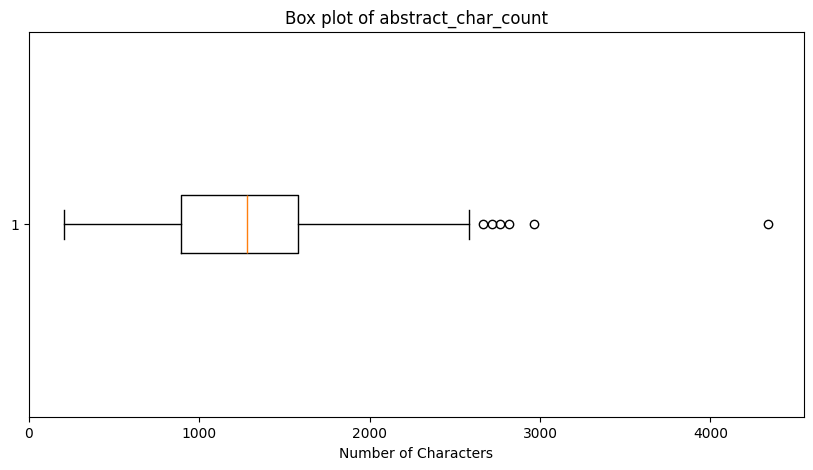

In [14]:
# plotting the counts in box plots
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(df['article_char_count'], vert=False)
plt.title('Box plot of article_char_count')
plt.xlabel('Number of Characters')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df['abstract_char_count'], vert=False)
plt.title('Box plot of abstract_char_count')
plt.xlabel('Number of Characters')
plt.show()


In [15]:
# printing rows with articles of character length less than 1000

df.loc[df['article_char_count'] < 1000]

,article,abstract,article_char_count,abstract_char_count
94,"\n supported by nci 2p50 ca09825806 , nci u01...",pik3r1 ( encoding the p85 subunit of phosphati...,278,387
155,\n \n we are grateful for financial support ...,abstractbacterial volatiles protect plants eit...,281,866
390,bspp : bisulfite padlock probe ; charm : compr...,dna methylation of promoter cpg islands is str...,714,1223
399,"as a service to our authors and readers , this...",abstractmacrocyclization can be used to constr...,357,991
456,to identify the possible barriers to the imple...,objective : to identify the possible barriers ...,898,1022
...,...,...,...,...
119619,the online version of this article ( doi:10.10...,high fruit and wine quality combined with good...,269,1476
119750,the presented data from literature and own det...,"so far , a fatty pancreas has been related to ...",784,2182
119821,\n,summarypoly(adp - ribose ) polymerases ( parps...,3,1341
119875,while trying to integrate multiple data sets c...,background : while trying to integrate multipl...,840,1002


In [16]:
# printing rows with articles of character length less than that of the abstracts

df.loc[df['article_char_count'] < df['abstract_char_count']]

,article,abstract,article_char_count,abstract_char_count
71,care coordination is an important aspect of nu...,introductioncare coordination is an important ...,2126,2309
94,"\n supported by nci 2p50 ca09825806 , nci u01...",pik3r1 ( encoding the p85 subunit of phosphati...,278,387
128,"established in 2003 , erste foundation has a h...","introductionestablished in 2003 , erste founda...",1399,1462
155,\n \n we are grateful for financial support ...,abstractbacterial volatiles protect plants eit...,281,866
291,ala - al - din abu al - hassan ali ibn abi - h...,background : ala - al - din abu al - hassan al...,1457,1709
...,...,...,...,...
119619,the online version of this article ( doi:10.10...,high fruit and wine quality combined with good...,269,1476
119684,to assess attitudes and practices of documenta...,purposes : to assess attitudes and practices o...,1013,1140
119750,the presented data from literature and own det...,"so far , a fatty pancreas has been related to ...",784,2182
119821,\n,summarypoly(adp - ribose ) polymerases ( parps...,3,1341


In [17]:
# printing rows with articles of character length equal to that of the abstracts

df.loc[df['article_char_count'] == df['abstract_char_count']]

,article,abstract,article_char_count,abstract_char_count
7676,the maldi - tof ms spectrum of c. massiliens...,we report the main characteristics of a new ge...,293,293


In [18]:
# removing rows with articles of character length less than or equal to that of the abstracts

df_cleaned = df.loc[df['article_char_count'] >= df['abstract_char_count']]

In [19]:
# printing the statistics

df_cleaned[['article_char_count','abstract_char_count']].describe()

,article_char_count,abstract_char_count
count,115777.000000,115777.000000
mean,18206.835520,1236.069833
std,14477.362483,459.327471
min,281.000000,205.000000
25%,9136.000000,893.000000
50%,15322.000000,1281.000000
75%,23363.000000,1582.000000
max,825741.000000,4340.000000


In [20]:
# printing first few rows of the preprocessed dataset

df_cleaned.head()

,article,abstract,article_char_count,abstract_char_count
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...,28460,1575
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...,18281,2010
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...,7419,1009
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...,37370,1403
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...,6918,1039


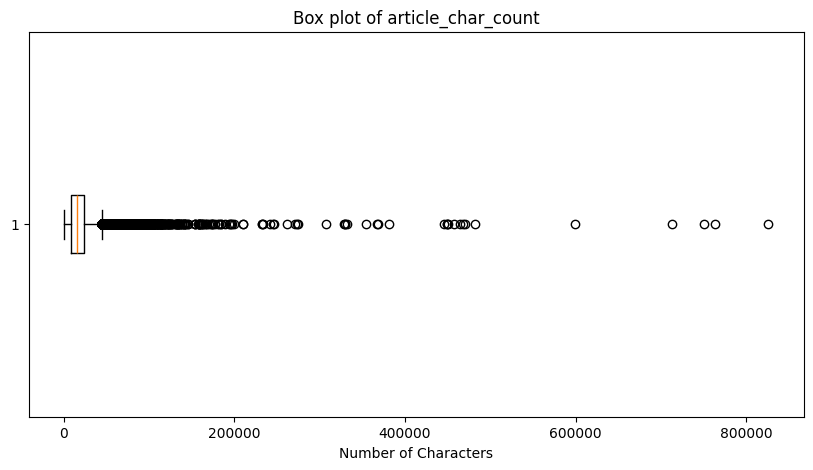

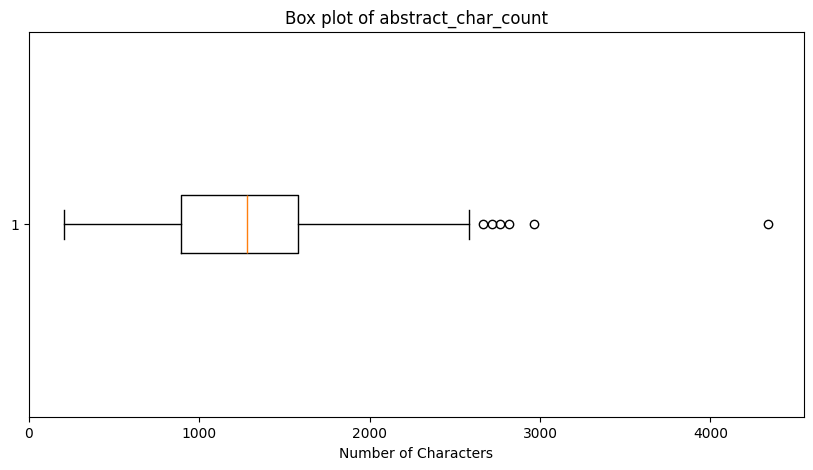

In [21]:
# plotting the counts in box plots

plt.figure(figsize=(10, 5))
plt.boxplot(df_cleaned['article_char_count'], vert=False)
plt.title('Box plot of article_char_count')
plt.xlabel('Number of Characters')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df_cleaned['abstract_char_count'], vert=False)
plt.title('Box plot of abstract_char_count')
plt.xlabel('Number of Characters')
plt.show()

In [22]:
#looking at the outliers in the abstract column

df_cleaned.loc[df_cleaned['abstract_char_count'] >2615]

,article,abstract,article_char_count,abstract_char_count
3665,"the normal prostate luminal cells , which are ...",our recent studies revealed that focal basal c...,20291,2720
29647,atrial fibrillation ( af ) continues to affect...,changes in cardiac tissue properties following...,20677,2967
32390,deep brain stimulation ( dbs ) is an effective...,design of a rectangular spiral planar inverted...,72951,2663
43030,"the four color theorem [ 1 , 2 ] asserts that ...",this paper extends the scenario of the four co...,271161,4340
49109,dehydration and overhydration entail a deficie...,the level of hydration in the human body is ca...,67908,2763
67896,measurements of the heavy quarkonium productio...,the polarisation of prompt \documentclass[12pt...,332580,2817


In [23]:
# dropping columns article_char_count and abstract_char_count

df_cleaned = df_cleaned.drop(['article_char_count', 'abstract_char_count'], axis=1)

In [24]:
# printing first few rows of the processed dataset
df_cleaned.head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...


In [25]:
# Saved the cleaned dataframe to a CSV file
# df_cleaned.to_csv('cleaned_train.csv', index=False)

In [26]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments

# Loading the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [27]:
# Converted the DataFrame to a Dataset
processed_dataset = Dataset.from_pandas(df_cleaned)

In [28]:
# Set eos_token as the padding token
tokenizer.pad_token = tokenizer.eos_token

# tokenize function
def tokenize_function(examples):
    return tokenizer(examples["article"], truncation=True, padding='max_length', max_length=512)

# Applying the tokenize function to the dataset
tokenized_dataset = processed_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/115777 [00:00<?, ? examples/s]

In [29]:
from torch.utils.data import DataLoader

# Convert tokenized dataset to DataLoader
train_dataset = tokenized_dataset.remove_columns(["article"])
train_dataset.set_format("torch")
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [30]:
!pip install transformers[torch]

In [31]:
pip install accelerate -U

In [33]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)


In [34]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer
)


In [35]:
trainer.train()


ValueError: The model did not return a loss from the inputs, only the following keys: logits,past_key_values. For reference, the inputs it received are input_ids,attention_mask.